<a href="https://colab.research.google.com/github/ashraf-abdalghani/mycolab/blob/main/Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
round(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


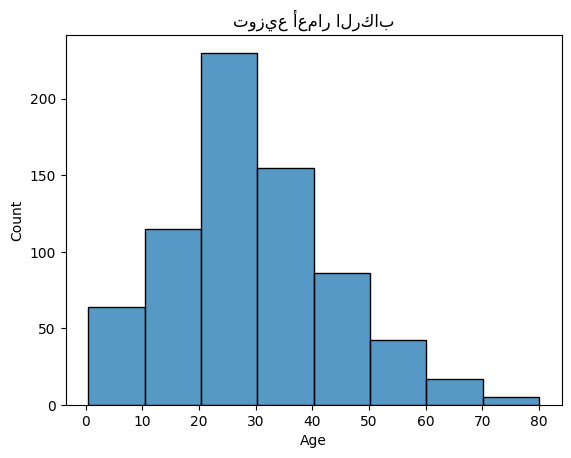

In [10]:
sns.histplot(df['Age'].dropna(),bins=8)
plt.title("توزيع أعمار الركاب")
plt.show()


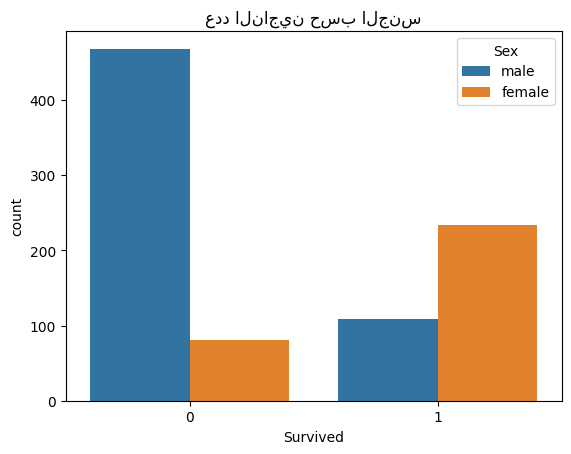

In [11]:
sns.countplot(x='Survived',data=df,hue='Sex')
plt.title("عدد الناجين حسب الجنس")
plt.show()

In [12]:
df.groupby('Pclass')['Survived'].value_counts().sort_index()


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='Age'>

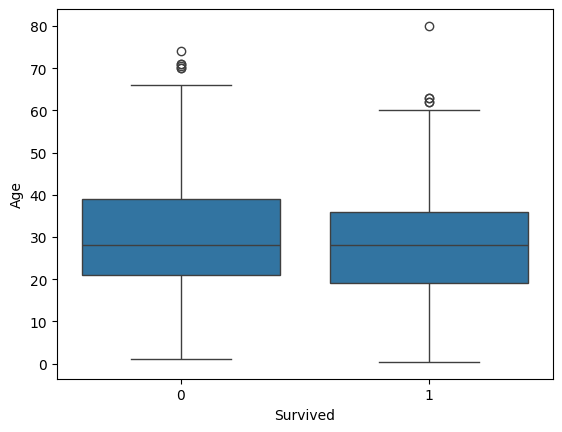

In [13]:
sns.boxplot(x='Survived', y='Age', data=df)

<Axes: xlabel='Survived', ylabel='Age'>

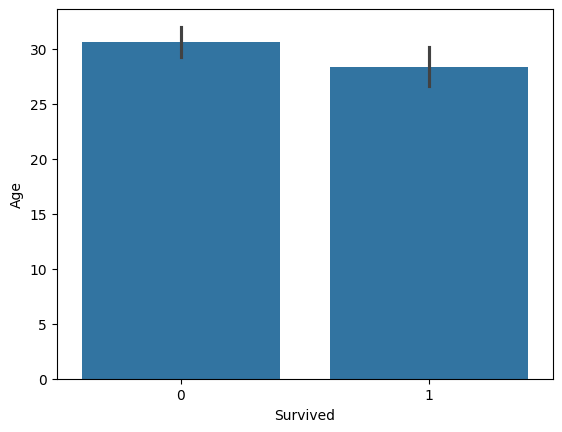

In [14]:
# sns.boxplot(x='Survived', y='Age', data=df)
sns.barplot(x='Survived', y='Age', data=df)

# Data Cleaning

In [15]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Age'].median()

28.0

In [17]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Embarked'].mode()[0]

'S'

In [18]:
df.drop('Cabin',axis=1,inplace=True)

In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


# تحويل النصوص الى ارقام داخل الجقول

In [21]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Sex']

,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [22]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})
df['Embarked']

,Embarked
0,0
1,1
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,1


# حذف الحقول الغير مهمة فى التحليل

In [23]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# حفظ نسخة جديدة نظيفة من الملف

In [25]:
df.to_csv('titanic_cleaned.csv', index=False)

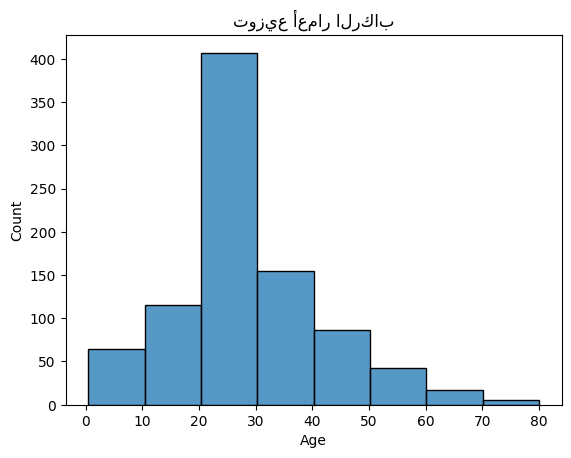

In [26]:
sns.histplot(df['Age'],bins=8)
plt.title("توزيع أعمار الركاب")
plt.show()

# انشاء فئة عمرية جديدة
## فئات (مثل: طفل، شاب، بالغ، مسن)

In [27]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Elderly'])

In [28]:
df.head(25)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,0,22.0,1,0,7.2500,0,Adult
1,1,1,1,38.0,1,0,71.2833,1,Adult
2,1,3,1,26.0,0,0,7.9250,0,Adult
3,1,1,1,35.0,1,0,53.1000,0,Adult
4,0,3,0,35.0,0,0,8.0500,0,Adult
5,0,3,0,28.0,0,0,8.4583,2,Adult
6,0,1,0,54.0,0,0,51.8625,0,Adult
7,0,3,0,2.0,3,1,21.0750,0,Child
8,1,3,1,27.0,0,2,11.1333,0,Adult
9,1,2,1,14.0,1,0,30.0708,1,Teen


In [29]:
df_titanic_cleaned = pd.read_csv('titanic_cleaned.csv')
df_titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [30]:
corr_matrix = df_titanic_cleaned.corr()
corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


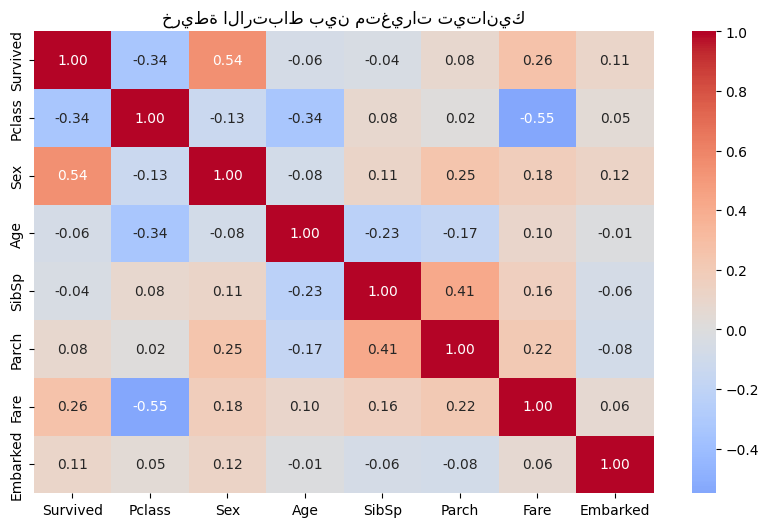

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,
            annot=True,  # لعرض القيم الرقمية داخل المربعات
            cmap='coolwarm',  # خريطة ألوان من الأحمر إلى الأزرق
            center=0,  # نقطة الوسط (لتمييز الارتباطات الموجبة والسالبة)
            fmt=".2f")  # عدد الكسور العشرية

plt.title('خريطة الارتباط بين متغيرات تيتانيك')
plt.show()